In [1]:
#pip install vaderSentiment

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
# reference: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    
    # Sentiment dictionary: pos, neg, neu and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Decide ranges for compound scores. The default range for neutral is -0.05 to 0.05. This can be discussed later
    overall = ""
    if sentiment_dict['compound'] >= 0.05 :
        overall = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        overall = "Negative"
    else :
        overall = "Neutral"
        
    sentiment_dict["overall"] = overall
    
    return(sentiment_dict)

In [4]:
# Sample Comments
com1 = {"Team" : "Carolina Panthers" , "W/L" : "L" , "Comment" : "OL and run game decent. Pass game bad. Defense still good unless put in bad spots. Need a WR1 like we need air"}
com2 = {"Team" : "Detroit Lions", "W/L" : "W" , "Comment" : "Holy fuck we did it. I don't give a shit. Jones, no Jones. Kelce, no kelce. We beat the champs in their building to open the season LFG"}
com3 = {"Team" : "Miami Dolphins", "W/L" : "W" , "Comment" : "I know the Tua Hill connection was legendary today, but can we all give thanks to JC Jackson for that interference call at the end of the first half?"}
com4 = {"Team" : "Los Angeles Chargers", "W/L" : "L", "Comment" : "Holding off judgements on the defense til next week. Miami night be the best offense in the league. But if they struggle next week, then we are in big trouble.Offense and specials teams looked good, Herbert had an average game but this seems to be common these days with QBs not playing in preseason, I'm not worried. Might be the best Oline since 08"}
com5 = {"Team" : "Pittsburgh Steelers", "W/L" : "L" , "Comment" : "New year, same shit. TJ is a motherfucker and our offensive line is horrible. Our play calling sucks and our quarterback can only throw outs for short gains."}

In [5]:
# Creating sample data frame
comments = [com1, com2, com3, com4, com5]
df = pd.DataFrame(data=comments)
df.head()

,Team,W/L,Comment
0,Carolina Panthers,L,OL and run game decent. Pass game bad. Defense...
1,Detroit Lions,W,Holy fuck we did it. I don't give a shit. Jone...
2,Miami Dolphins,W,I know the Tua Hill connection was legendary t...
3,Los Angeles Chargers,L,Holding off judgements on the defense til next...
4,Pittsburgh Steelers,L,"New year, same shit. TJ is a motherfucker and ..."


In [6]:
# Iterating through the dataframe, and updating the df with sentiment scores. 
# Not sure if this is the most efficient/fastest way to do this. Feel free to input
start_time = time.time() # Measuring time to run command

# Keep in mind the dictionary sentiment_scores returns neg, neu, pos, compound and overall. Might not need each of these. 
# Compound is the main variable to look at
df["Compound"] = df["Comment"].apply(lambda com: sentiment_scores(com)['compound'])

# If we want each sentiment score:
df["Negative"] = df["Comment"].apply(lambda com: sentiment_scores(com)['neg'])
df["Neutral"] = df["Comment"].apply(lambda com: sentiment_scores(com)['neu'])
df["Positive"] = df["Comment"].apply(lambda com: sentiment_scores(com)['pos'])
# Is there a better way to do this that is much more time efficient?

end_time = time.time()    
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time}")


Execution time: 0.23658990859985352


In [7]:
df.head()

,Team,W/L,Comment,Compound,Negative,Neutral,Positive
0,Carolina Panthers,L,OL and run game decent. Pass game bad. Defense...,-0.2732,0.219,0.564,0.216
1,Detroit Lions,W,Holy fuck we did it. I don't give a shit. Jone...,-0.2905,0.216,0.628,0.156
2,Miami Dolphins,W,I know the Tua Hill connection was legendary t...,0.5927,0.000,0.879,0.121
3,Los Angeles Chargers,L,Holding off judgements on the defense til next...,0.8884,0.081,0.716,0.203
4,Pittsburgh Steelers,L,"New year, same shit. TJ is a motherfucker and ...",-0.9246,0.400,0.488,0.112


In [8]:
# Here is a comment that is positive but is viewed by Vader as negative.
# We'll probably have to look at the neg, neu and pos values seperately and make our own 

print(sentiment_scores("Holy fuck we did it. I don't give a shit. Jones, no Jones. Kelce, no kelce. We beat the champs in their building to open the season LFG"))

{'neg': 0.216, 'neu': 0.628, 'pos': 0.156, 'compound': -0.2905, 'overall': 'Negative'}


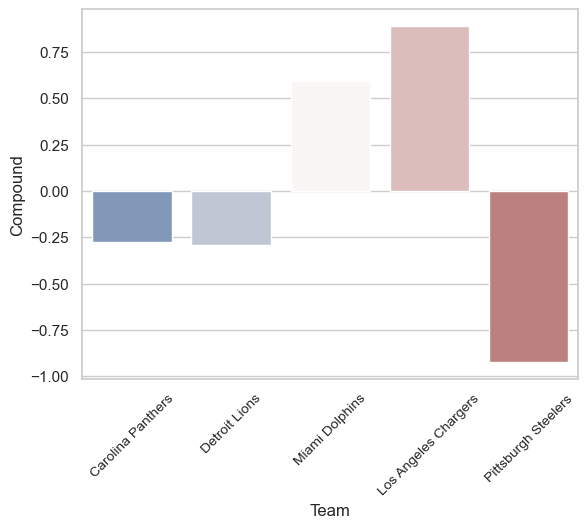

In [23]:
# Some sample exploratory data analysis:
sns.set_theme(style="whitegrid")
plt.xticks(fontsize = 10, rotation=45)
plot1 = sns.barplot(x = df["Team"], y = df["Compound"], palette="vlag")

# Of course this can be done later with averages for each team

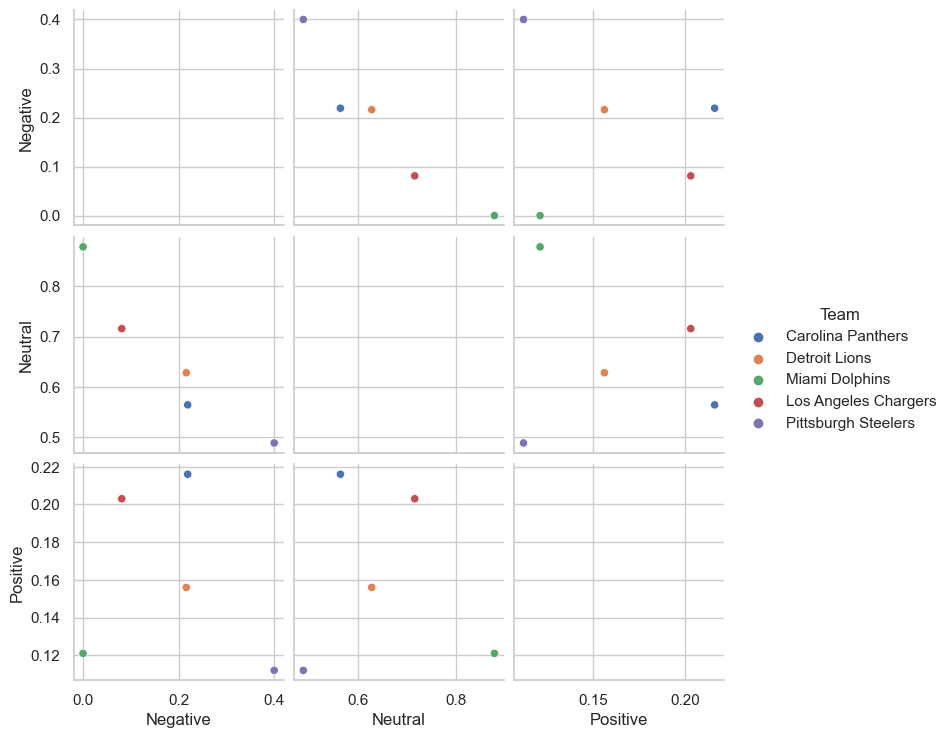

In [31]:
# Looking at negative, neutral and positive scrores all together
sns.pairplot(df[["Negative", "Neutral", "Positive", "Team"]], hue="Team")

# This will hopefully look better with more data